# **Amazon Metadata Dataset**


In [1]:
from collections import Counter
from pprint import pprint

import delta_sharing
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
from IPython.display import HTML, display
from wordcloud import WordCloud

In [2]:
# get data
profile_file = "config.share"
client = delta_sharing.SharingClient(profile_file)
print("Available tables:")
pprint(client.list_all_tables())

table_url = profile_file + "#share__products.silver.amazon_metadata_silver"
df = delta_sharing.load_as_pandas(table_url, limit=200_000)

Available tables:
[Table(name='sentiment', share='share__products', schema='gold'),
 Table(name='amazon_reviews_selected', share='share__products', schema='silver'),
 Table(name='intention', share='share__products', schema='gold'),
 Table(name='amazon_metadata_silver_selected', share='share__products', schema='silver'),
 Table(name='amazon_reviews_silver', share='share__products', schema='silver'),
 Table(name='amazon_metadata_silver', share='share__products', schema='silver')]


In [3]:
print("Dataset shape", df.shape)

df.head()

Dataset shape (200000, 15)


,asin,title,brand,main_category,category,description,feature,mean_price,rank,also_buy,also_view,similar_items,image,source,timestamp_ingested
0,B006084O7G,"Dell Computer, Intel 3.0 GHz Pentium D , New 2...",Dell,Electronics,"[Electronics, Computers & Accessories, Compute...","Dell Computer, Intel 3.0 GHz Pentium D , New 2...",[These Units are Highly Sought After for their...,90.400002,"[{'top': 75464, 'category': 'Computers & Acces...",None,None,"[B0037U95U6, B01M7UFBQ9, B006084O7G, B013PIMPMO]",[https://images-na.ssl-images-amazon.com/image...,batch,2023-07-26
1,B00608BLV8,iShoppingdeals - for Sony Walkman NWZ-E463 NWZ...,Ishoppingdeals,Electronics,"[Electronics, Portable Audio & Video, MP3 & MP...",None,None,NaN,"[{'top': 1092534, 'category': 'Electronics > P...",None,None,None,[https://images-na.ssl-images-amazon.com/image...,batch,2023-07-26
2,B00608C64E,Sunon PMD1206PMB3-A (2).B938.F Cooling Fan 12V...,Sunon,Electronics,"[Electronics, Computers & Accessories, Compute...",Sunon 12V .43A Cooling Fan Sunon Part Numbers ...,"[12V - .43A (5.2W), 60mm x 60mm x 38mm, 4 Pin ...",NaN,"[{'top': 3535, 'category': 'Industrial & Scien...",None,"[B00RYKR83Q, B00GJYTUH0, B0188YKCFC, B00608LYV...","[B00GJYTUH0, B00608C64E, B00608LYVK, B009NQMES...",[https://images-na.ssl-images-amazon.com/image...,batch,2023-07-26
3,B00608FKN8,Seasonic PLATINUM-1000 ATX 1000 Power Supply,Seasonic,Electronics,"[Electronics, Computers & Accessories, Compute...",SeaSonic Platinum-1000 1000W ATX12V / EPS12V 8...,"[Type ATX12V / EPS12V, Maximum Power 1000 Watt...",NaN,"[{'top': 2323, 'category': 'Computers & Access...",None,"[B00Q6CAZ4M, B01N5NWKHH, B075M3B1R7, B075M8FH4...","[B002VA7RPS, B00Q6CAZ4M, B075M3B1R7, B00608FKN...",[https://images-na.ssl-images-amazon.com/image...,batch,2023-07-26
4,B00608MP5E,SeaSonic Platinum PLATINUM-860 ; SS-860XP2 Po...,Seasonic,Electronics,"[Electronics, Computers & Accessories, Compute...",Seasonic PLATINUM-860 860W 80Plus EPS12V / ATX...,"[Total Power: 860 Watt, Input Voltage: 100 ~ 2...",NaN,"[{'top': 1685, 'category': 'Computers & Access...","[B00J2LIE9C, B00OBRE5UE, B008CP5QR2, B01LXS4TY...","[B074NB1PBZ, B075M3R4YB, B075M4SJL6, B075M3WC9...","[B00608MP5E, B074NB1PBZ, B011HNSSES, B00IKDETO...",[https://images-na.ssl-images-amazon.com/image...,batch,2023-07-26


**Insights**

- The columns that look like lists are actually numpy arrays. ¿Why they come in this format?

In [4]:
df.dtypes

asin                          object
title                         object
brand                         object
main_category                 object
category                      object
description                   object
feature                       object
mean_price                   float32
rank                          object
also_buy                      object
also_view                     object
similar_items                 object
image                         object
source                        object
timestamp_ingested    datetime64[ns]
dtype: object

---

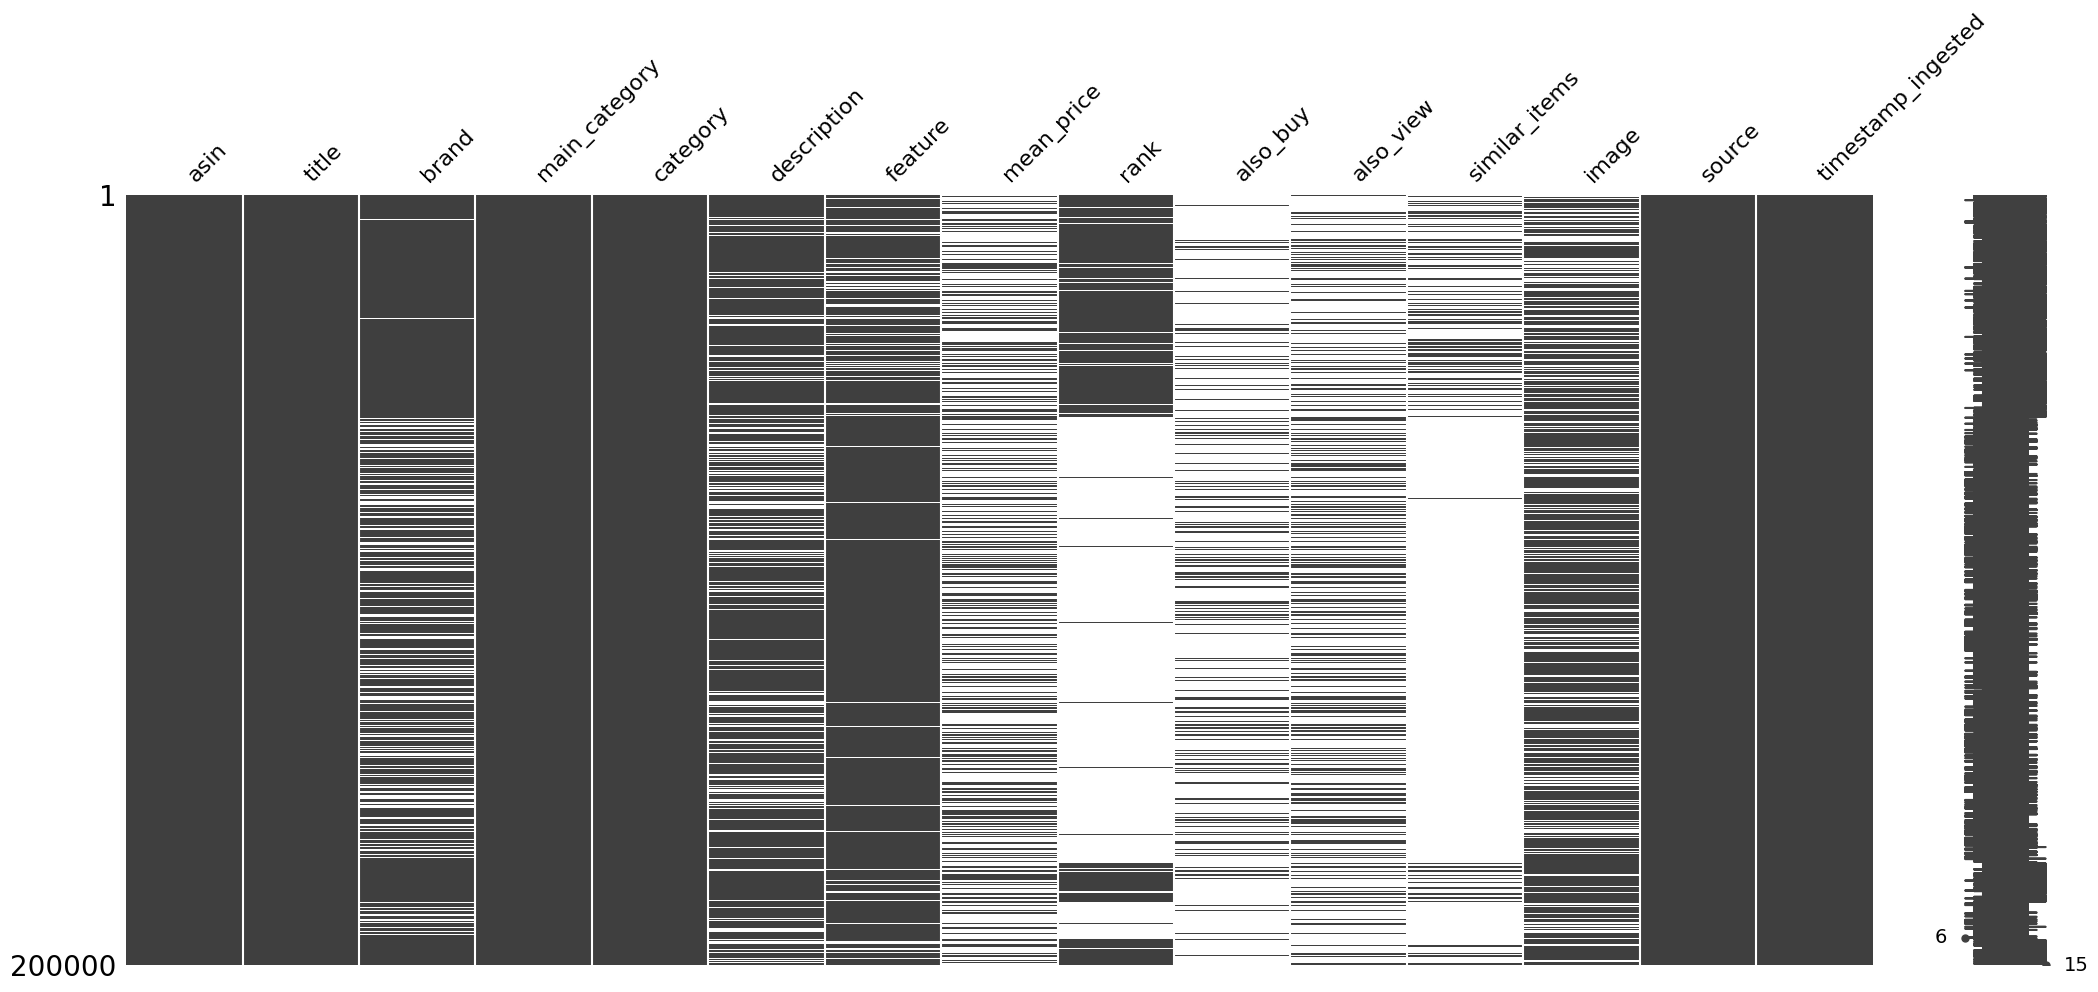

In [5]:
msno.matrix(df);

---

In [6]:
df["asin"].value_counts()

asin
B012VJWQXG    1
B012VK3TY0    1
B012VK0OAW    1
B012VJY102    1
B012VK3QFM    1
             ..
B00608FKN8    1
B00608MP5E    1
B00608Q8G6    1
B00608J69C    1
B00608M09K    1
Name: count, Length: 200000, dtype: int64

In [8]:
num_dup = df.duplicated("asin", keep="first").sum()
print(f"Percentaje of duplicated reviews {num_dup / len(df) * 100:.2f}%")

Percentaje of duplicated reviews 0.00%


---

In [9]:
# shapes of the arrays in the also_buy column
df["also_buy"].map(lambda x: x.shape if x is not None else None).unique()

array([None, (11,), (7,), (23,), (89,), (93,), (83,), (1,), (2,), (32,),
       (24,), (38,), (5,), (6,), (4,), (10,), (96,), (13,), (28,), (29,),
       (3,), (19,), (41,), (90,), (95,), (17,), (99,), (8,), (71,), (69,),
       (16,), (22,), (86,), (91,), (9,), (34,), (12,), (73,), (25,),
       (44,), (14,), (53,), (45,), (27,), (18,), (15,), (36,), (77,),
       (63,), (39,), (40,), (78,), (20,), (94,), (33,), (85,), (92,),
       (84,), (49,), (81,), (98,), (43,), (21,), (82,), (58,), (42,),
       (37,), (51,), (35,), (97,), (55,), (52,), (87,), (62,), (57,),
       (79,), (88,), (68,), (74,), (31,), (48,), (100,), (59,), (54,),
       (60,), (72,), (66,), (70,), (61,), (30,), (65,), (26,), (75,),
       (50,), (76,), (47,), (56,), (67,), (46,), (64,), (80,)],
      dtype=object)

**Insights**
- `also_buy` columns are 1-dimensional numpy arrays, so they might be better represented as python lists.

In [10]:
print("Products with 'also_buy' attr greater than 0:")
(df["also_buy"].isnull().value_counts() / len(df) * 100).reset_index()

Products with 'also_buy' attr greater than 0:


,also_buy,count
0,True,82.1045
1,False,17.8955


In [11]:
also_buy_no_null = df["also_buy"].dropna()
also_buy_no_null

4         [B00J2LIE9C, B00OBRE5UE, B008CP5QR2, B01LXS4TY...
6         [B0079R113C, B007KZVIWM, B004JV8MJC, B00PJMFI6...
10        [B00RYKR83Q, B0188YKCFC, B00QGMESHM, B07D68VBW...
15        [B009W9V2N4, B078RYSGTR, B07K3FN5MR, B07H7ZBXC...
16        [B01H4EIS4O, B00NODEEBQ, B00V174E1W, B074V3ZWS...
                                ...                        
199948                             [B0734RKVLT, B06X9NDN8B]
199952    [B06XQBQY2B, B014I8SSD0, B06XFQNFSS, B01D5H8JW...
199956    [B0716JJNDM, B06XDML57T, B01J13P59C, B06XQVBQW...
199959                                         [B01KJUBRCU]
199970    [B01FEU90ZQ, B06WWLFH9Z, B01C5KQD5I, B079K2DS3...
Name: also_buy, Length: 35791, dtype: object

---

In [12]:
df["brand"].value_counts().reset_index()

,brand,count
0,Amazon Collection,1796
1,Generic,1160
2,Unknown,900
3,Sony,809
4,Inspired Silver,752
...,...,...
25560,Boating Accessories,1
25561,Djw,1
25562,Etn,1
25563,Deemoe,1


**Insights**
- This counts might not be relevant as this is only a small subset of the whole dataset.

In [13]:
print("Products with 'also_view' attr greater than 0:")
(df["also_view"].isnull().value_counts() / len(df) * 100).reset_index()

Products with 'also_view' attr greater than 0:


,also_view,count
0,True,69.466
1,False,30.534


---

In [14]:
categories = Counter()

df["category"].dropna().map(lambda x: categories.update(x.tolist()))

print("Number of categories:", len(categories))

Number of categories: 205724


In [15]:
print("Most common categories:")

categories.most_common(10)

Most common categories:


[('Clothing', 185376),
 (' Shoes & Jewelry', 125860),
 ('Electronics', 74140),
 ('Women', 66282),
 ('Men', 36573),
 ('Computers & Accessories', 34362),
 ('Imported', 24126),
 ('Novelty & More', 21214),
 ('Shoes', 20807),
 ('Novelty', 18864)]

---

In [16]:
df["description"].dropna().map(len)

0          159
2          142
3           92
4           62
6           22
          ... 
199987    1197
199988    1197
199991     123
199998       4
199999     194
Name: description, Length: 157685, dtype: int64

In [17]:
for _, row in df.dropna(subset=["description"]).sample(1).iterrows():
    description = row["description"]
    print(description)

The S4 Custom System Case with quality hardware and construction that is allows you to store your digital camera. The S4 offers a customizable interior with adjustable padded walls and offers a padded handle for comfortable carrying.


**Insights**
- Some products don't have description.

---

In [48]:
for _, row in df.dropna().sample(1).iterrows():
    features = row["feature"]
    print("Number of features:", len(features))
    print(features)

Number of features: 5
['GMS CERTIFICATED TABLET WITH ANDROID 6.0:The GMS (Google Mobile Service) certificated tablet ensures effectiveness, reliability and availability. You can use the apps upgraded and tested by Google safely. Google Android 6.0 Marshmallow Operating System provides you user-friendlyinterfaces and easy operation.'
 'POCKET-SIZED AND HIGH-PERFORMANCE: 7 inch capacitive TFT display, up to 1.3GHZ Quad core processor, 1GB RAM and 8GB internal Storage, iRULU X37 brings you fluid userexperience and smooth multi-tasking. Dont need to worry about computer speed and storage capacity. Perfect for gaming, watching movies and handling mail.'
 'MULTIPLE FUNCTION SUPPORT:Wi-Fi, Bluetooth and USB port enable you to browse the internet and connect with other devices easily. Dual Cameras allow you to snap photos or make video calls via Skype. Its also compatible with keyboard, headphone and printer. Come with more function, Satisfy all your needs.'
 'GREAT FOR ENTERTAINMENT:With pre-

**Insights**
- Some `features` are in html format

---

In [50]:
df["main_category"].value_counts().reset_index()

,main_category,count
0,Clothing,125860
1,Electronics,74140


---

In [63]:
df["title"].map(len).value_counts().sort_index().to_frame().head()

,count
title,
0,5
1,5
2,1
3,5
4,5


In [53]:
for _, row in df.dropna().sample(10).iterrows():
    title = row["title"]
    print(title)

Seagate 250GB Constellation SATA 6Gb/s 64MB Cache 2.5-Inch Internal Bare Drive (ST9250610NS)
Solo Premium Leather Ascent Case for iPad , Espresso, VTA210-3
Microsoft Surface Pro 3 Tablet (12-Inch, 512 GB, Intel Core i7, Windows 10)
NVX True 900 watt RMS 5-Channel [JAD Series] Class D Car Full Range Amplifier [JAD900.5]
Autolizer Sleeve Bearing 120mm RGB Multi-Color LEDs Silent Cooling Fan for Computer PC Cases, CPU Coolers and Radiators, High Airflow, Quiet and Transparent - 2 Years Warranty
12 Disc CD/DVD/Game Transparent Vinyl Storage Wallet Blue.
Stylus Pens, Besgoods 10Pack Colors 2 in 1 Crystal Universal Capacitive Stylus &amp;Ballpoint Pen Compatible iPhone X 8 7 Plus, iPad, Tablets, Samsung, Android, Black/White/Blue/red/Green
Amcrest Full HD 1080P 1920TVL Bullet Outdoor Security Camera (Quadbrid 4-in1 HD-CVI/TVI/AHD/Analog), 2MP 1920x1080, 98ft Night Vision, Metal Housing, 3.6mm Lens 90&deg; FOV, White (AMC1080BC36-W)
HGST Touro Mobile 500GB USB 3.0 External Hard Drive, Black (

---

In [64]:
df["similar_items"].dropna()

0          [B0037U95U6, B01M7UFBQ9, B006084O7G, B013PIMPMO]
2         [B00GJYTUH0, B00608C64E, B00608LYVK, B009NQMES...
3         [B002VA7RPS, B00Q6CAZ4M, B075M3B1R7, B00608FKN...
4         [B00608MP5E, B074NB1PBZ, B011HNSSES, B00IKDETO...
8          [B005VU2PI4, B00608Z8M6, B00608VOE2, B005VTRTEA]
                                ...                        
199977     [B01HSSAZX8, B012VMWUKW, B012VOUP48, B01LYY04GC]
199978    [B012VOP0WK, B00R0I6IFG, B06Y665PL6, B012VOP2Q...
199979     [B012VOOVL6, B012VQUH6C, B012VOVYMU, B012VPGHGM]
199980    [B0095OTYTU, B076BQB6BT, B074QNJQRB, B013I1RJ5...
199981    [B01IFWXJYS, B00KR6Q1VO, B00NFOC0K6, B00PZ78M7...
Name: similar_items, Length: 23122, dtype: object